In [1]:
import pandas as pd

In [2]:
titanic_data = pd.read_csv('C:/Users/Computer/Downloads/train.csv')
titanic_data.head() # first few rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.info() # summary of the dataset
titanic_data.isnull().sum() # Missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Data Cleaning, Handle missing values
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median()) # Replace missing 'Age' values with the median age
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0]) # Fill missing 'Embarked' values with the mode
titanic_data.drop(columns=['Cabin'], inplace=True) # Drop the 'Cabin' column as it has too many missing values
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1}) # Convert 'Sex' column to numeric
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})# Convert 'Embarked' column to numeric

In [5]:
# Descriptive Statistics
print(titanic_data.describe())  # Summary statistics for numerical data
print(titanic_data['Survived'].value_counts())  # Check class distribution

       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    0.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare    Embarked  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208    0.361392  
std      1.102743    0.806057   49.693429    0.635673  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400    0.000000  
50%      0.000000    0.000000   1

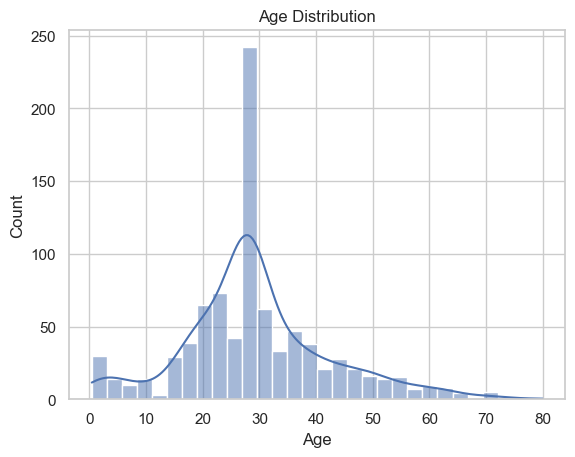

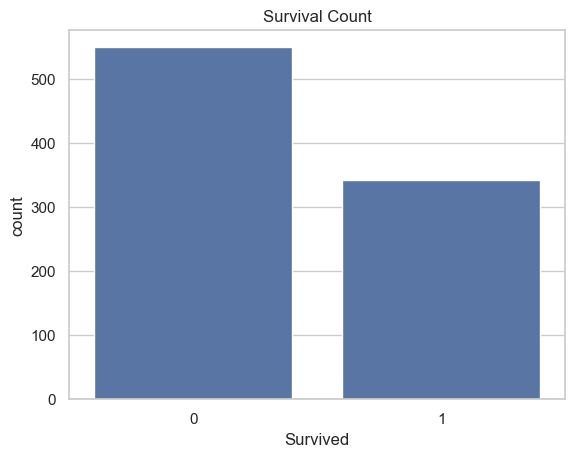

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid") # style of the visualization

# Univariate Analysis
## Histogram of Age
sns.histplot(titanic_data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

## Bar plot of Survived
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Count')
plt.show()



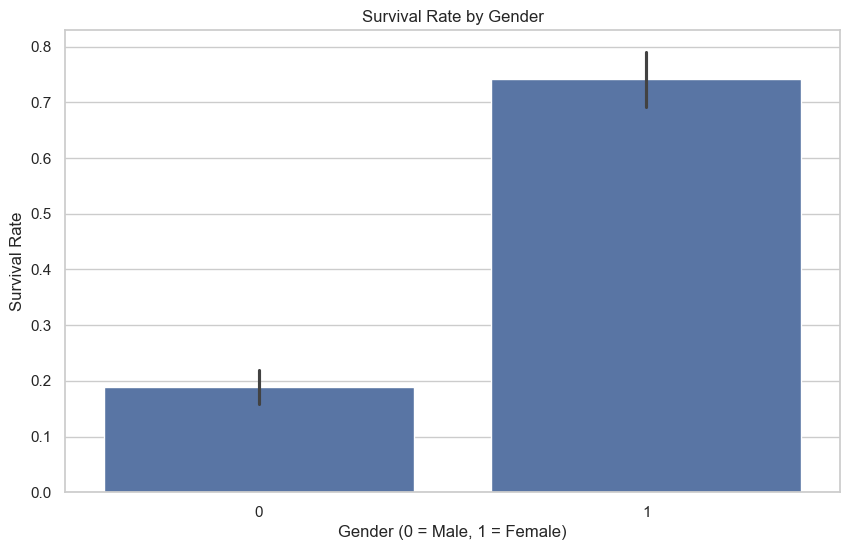

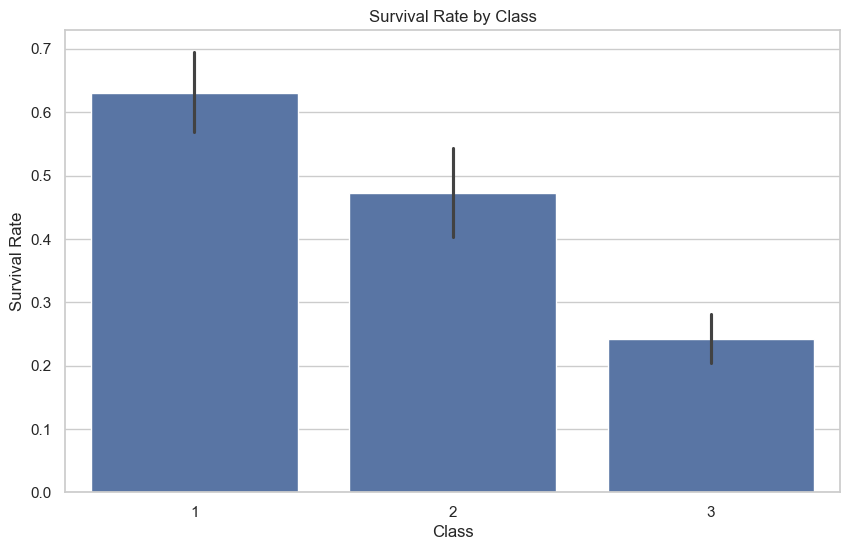

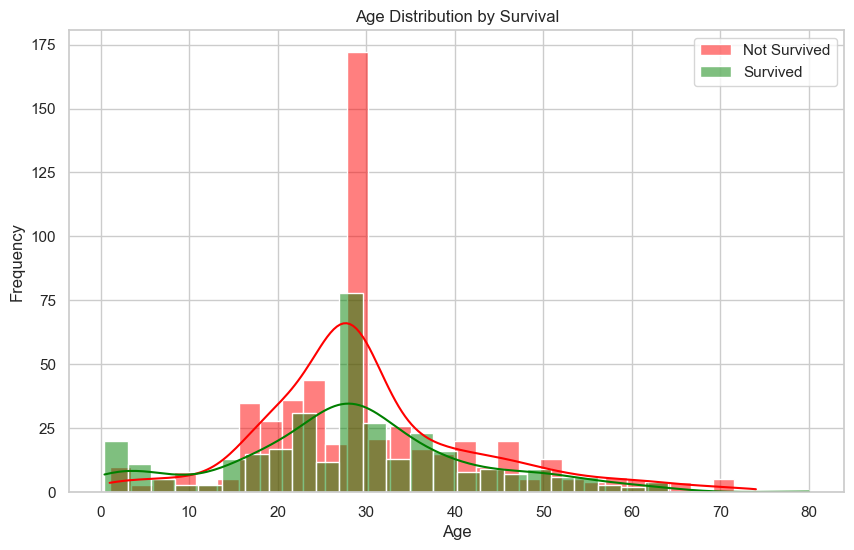

In [7]:
# Plot the survival rate by gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=titanic_data)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Survival Rate')
plt.show()

# Plot the survival rate by class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic_data)
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()

# Plot the age distribution by survival
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data[titanic_data['Survived'] == 0]['Age'], color='red', label='Not Survived', kde=True, bins=30)
sns.histplot(titanic_data[titanic_data['Survived'] == 1]['Age'], color='green', label='Survived', kde=True, bins=30)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

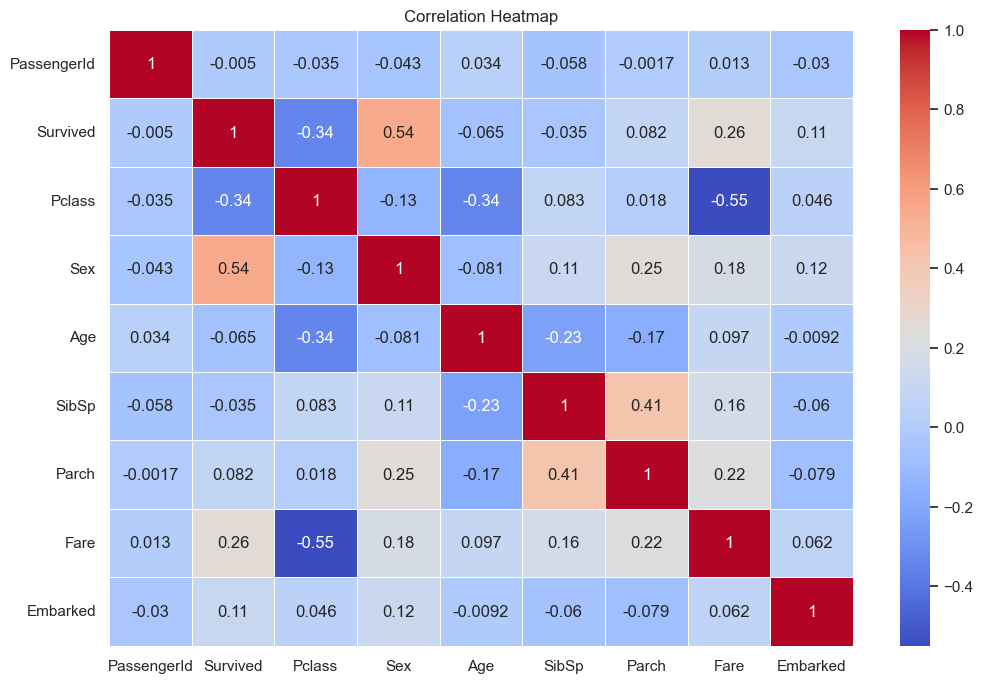

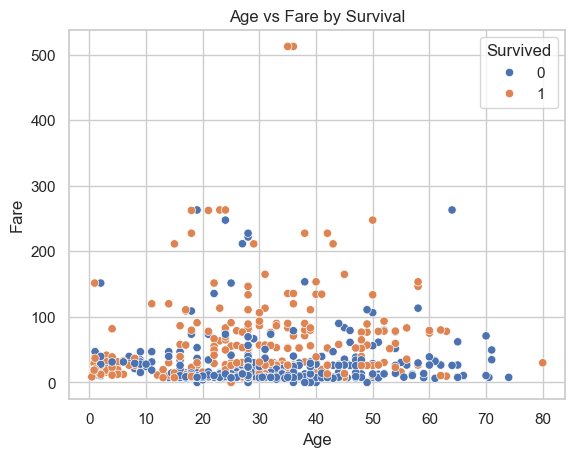

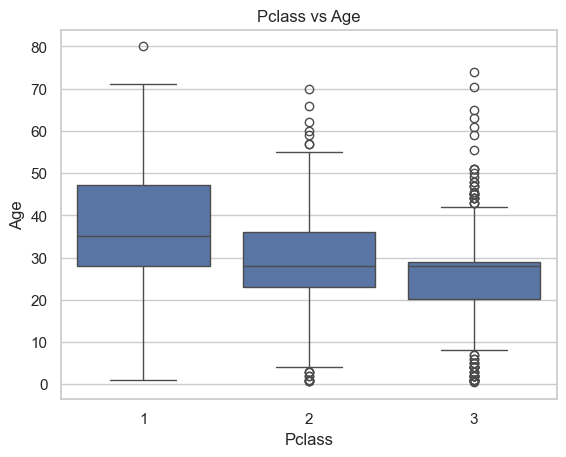

In [ ]:
# Bivariate Analysis
## Heatmap of correlations
titanic_numeric = titanic_data.select_dtypes(include=[float, int])
plt.figure(figsize=(12, 8))
sns.heatmap(titanic_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Scatter plot of Age vs Fare
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_data)
plt.title('Age vs Fare by Survival')
plt.show()

## Box plot of Pclass vs Age
sns.boxplot(x='Pclass', y='Age', data=titanic_data)
plt.title('Pclass vs Age')
plt.show()

# Multivariate Analysis
## Pairplot
sns.pairplot(titanic_data, hue='Survived', diag_kind='kde')
plt.show()
